<a href="https://colab.research.google.com/github/EleonoraBartolomucci/Fairness/blob/master/Esperimenti/primoEsperimentoMiky_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

sort = 'Random'

# file con i dati di tutti i ristoranti random
all_analysis = '1n9vdCnppJGdE6M6HdKYlksuTntQYHA7P'  # FILE ID, got on google drive with condivision link
download = drive.CreateFile({'id': all_analysis})
download.GetContentFile('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

# leggo il csv con pandas
res = pd.read_csv('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

#res_agg = res.groupby(['restaurant','ethnicity']).count()[['user_id']]    #agg({'user_id':count})
#res_agg = res[res['restaurant'] == 'TupeloHoney'].groupby('ethnicity').count() 

In [43]:
# Prendo i dati che mi servono dei ristoranti

#Osservazione: prendo il totale complessivo non il totale della categoria 

asian = res['ethnicity'] == 'asian'
mexican = res['ethnicity'] == 'hispanic, latino, or spanish origin'
black_american = res['ethnicity'] == 'black or african american'
white_american = res['ethnicity'] == 'white'
positive = res['review_sentiment'] == 'positive'
negative = res['review_sentiment'] == 'negative'
neutral = res['review_sentiment'] == 'neutral'

# AMERICAN

totaleTupelo = len(res[(res['restaurant'] == 'TupeloHoney')])
totaleCravings = len(res[(res['restaurant'] == 'CravingsBuffet')])
totaleCulinary = len(res[(res['restaurant'] == 'CulinaryDropout')])

totAmericanUsers = totaleTupelo + totaleCravings + totaleCulinary

restaurant_typology = 'American'
typology = len(res[(res['typology'] == '%s' % restaurant_typology)])

# POSITIVI
# numero medio di utenti asiatici, messicani e americani sul totale
asian_american_positive = (len(res[(res['typology'] == '%s' % restaurant_typology) & (asian) & (positive)]) * 100) / totAmericanUsers
mexican_american_positive = (len(res[(res['typology'] == '%s' % restaurant_typology) & (mexican) & (positive)]) * 100) / totAmericanUsers
american_american_positive = ((len(res[((res['typology'] == '%s' % restaurant_typology) & (black_american) & (positive)) | 
                          ((res['typology'] == '%s' % restaurant_typology) & (white_american) & (positive))])) * 100) / totAmericanUsers

# NEGATIVI
# numero medio di utenti asiatici, messicani e americani sul totale
asian_american_negative = (len(res[(res['typology'] == '%s' % restaurant_typology) & (asian) & (negative)]) * 100) / totAmericanUsers
mexican_american_negative = (len(res[(res['typology'] == '%s' % restaurant_typology) & (mexican) & (negative)]) * 100) / totAmericanUsers
american_american_negative = ((len(res[((res['typology'] == '%s' % restaurant_typology) & (black_american) & (negative)) | 
                          ((res['typology'] == '%s' % restaurant_typology) & (white_american) & (negative))])) * 100) / totAmericanUsers

# NEUTRI
# numero medio di utenti asiatici, messicani e americani sul totale
asian_american_neutral = (len(res[(res['typology'] == '%s' % restaurant_typology) & (asian) & (neutral)]) * 100) / totAmericanUsers
mexican_american_neutral = (len(res[(res['typology'] == '%s' % restaurant_typology) & (mexican) & (neutral)]) * 100) / totAmericanUsers
american_american_neutral = ((len(res[((res['typology'] == '%s' % restaurant_typology) & (black_american) & (neutral)) | 
                          ((res['typology'] == '%s' % restaurant_typology) & (white_american) & (neutral))])) * 100) / totAmericanUsers


# ASIAN

totaleFuto = len(res[(res['restaurant'] == 'FutoButa')])
totaleIchiza = len(res[(res['restaurant'] == 'Ichiza')])
totaleHarumi = len(res[(res['restaurant'] == 'HarumiSushi')])

totAsianUsers = totaleFuto + totaleIchiza + totaleHarumi

restaurant_typology = 'Japanese'
typology = len(res[(res['typology'] == '%s' % restaurant_typology)])


# POSITIVI
# numero medio di utenti asiatici, messicani e americani sul totale
asian_asian_positive = (len(res[(res['typology'] == '%s' % restaurant_typology) & (asian) & (positive)]) * 100) / totAsianUsers
mexican_asian_positive = (len(res[(res['typology'] == '%s' % restaurant_typology) & (mexican) & (positive)]) * 100) / totAsianUsers
american_asian_positive = ((len(res[((res['typology'] == '%s' % restaurant_typology) & (black_american) & (positive)) | 
                          ((res['typology'] == '%s' % restaurant_typology) & (white_american) & (positive))])) * 100) / totAsianUsers


# NEGATIVI
# numero medio di utenti asiatici, messicani e americani sul totale
asian_asian_negative = (len(res[(res['typology'] == '%s' % restaurant_typology) & (asian) & (negative)]) * 100) / totAsianUsers
mexican_asian_negative = (len(res[(res['typology'] == '%s' % restaurant_typology) & (mexican) & (negative)]) * 100) / totAsianUsers
american_asian_negative = ((len(res[((res['typology'] == '%s' % restaurant_typology) & (black_american) & (negative)) | 
                          ((res['typology'] == '%s' % restaurant_typology) & (white_american) & (negative))])) * 100) / totAsianUsers


# NEUTRI
# numero medio di utenti asiatici, messicani e americani sul totale
asian_asian_neutral = (len(res[(res['typology'] == '%s' % restaurant_typology) & (asian) & (neutral)]) * 100) / totAsianUsers
mexican_asian_neutral = (len(res[(res['typology'] == '%s' % restaurant_typology) & (mexican) & (neutral)]) * 100) / totAsianUsers
american_asian_neutral = ((len(res[((res['typology'] == '%s' % restaurant_typology) & (black_american) & (neutral)) | 
                          ((res['typology'] == '%s' % restaurant_typology) & (white_american) & (neutral))])) * 100) / totAsianUsers



# MEXICAN

totaleCabo = len(res[(res['restaurant'] == 'CaboFishTaco')])
totaleBackyard = len(res[(res['restaurant'] == 'BackyardTaco')])
totaleLindo = len(res[(res['restaurant'] == 'LindoMichoacan')])

totMexicanUsers = totaleCabo + totaleBackyard + totaleLindo

restaurant_typology = 'Mexican'
typology = len(res[(res['typology'] == '%s' % restaurant_typology)])


# POSITIVI
# numero medio di utenti asiatici, messicani e americani sul totale
asian_mexican_positive = (len(res[(res['typology'] == '%s' % restaurant_typology) & (asian) & (positive)]) * 100) / totMexicanUsers
mexican_mexican_positive = (len(res[(res['typology'] == '%s' % restaurant_typology) & (mexican) & (positive)]) * 100) / totMexicanUsers
american_mexican_positive = ((len(res[((res['typology'] == '%s' % restaurant_typology) & (black_american) & (positive)) | 
                          ((res['typology'] == '%s' % restaurant_typology) & (white_american) & (positive))])) * 100) / totMexicanUsers


# NEGATIVI
# numero medio di utenti asiatici, messicani e americani sul totale
asian_mexican_negative = (len(res[(res['typology'] == '%s' % restaurant_typology) & (asian) & (negative)]) * 100) / totMexicanUsers
mexican_mexican_negative = (len(res[(res['typology'] == '%s' % restaurant_typology) & (mexican) & (negative)]) * 100) / totMexicanUsers
american_mexican_negative = ((len(res[((res['typology'] == '%s' % restaurant_typology) & (black_american) & (negative)) | 
                          ((res['typology'] == '%s' % restaurant_typology) & (white_american) & (negative))])) * 100) / totMexicanUsers


# NEUTRI
# numero medio di utenti asiatici, messicani e americani sul totale
asian_mexican_neutral = (len(res[(res['typology'] == '%s' % restaurant_typology) & (asian) & (neutral)]) * 100) / totMexicanUsers
mexican_mexican_neutral = (len(res[(res['typology'] == '%s' % restaurant_typology) & (mexican) & (neutral)]) * 100) / totMexicanUsers
american_mexican_neutral = ((len(res[((res['typology'] == '%s' % restaurant_typology) & (black_american) & (neutral)) | 
                          ((res['typology'] == '%s' % restaurant_typology) & (white_american) & (neutral))])) * 100) / totMexicanUsers


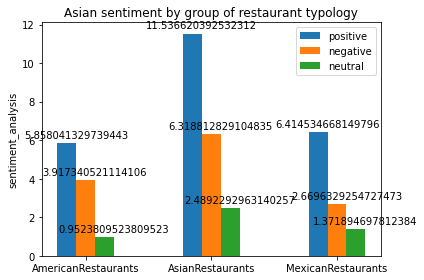

In [46]:
# Costruisco il grafico

labels = ['AmericanRestaurants', 'AsianRestaurants', 'MexicanRestaurants']

# GRAFICO PER ASIATICI

asianPositive = [asian_american_positive, asian_asian_positive, asian_mexican_positive]
asianNegative = [asian_american_negative, asian_asian_negative, asian_mexican_negative]
asianNeutral = [asian_american_neutral, asian_asian_neutral, asian_mexican_neutral]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, asianPositive, width, label='positive')
rects2 = ax.bar(x, asianNegative, width, label='negative')
rects3 = ax.bar(x + width, asianNeutral, width, label='neutral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('sentiment_analysis')
ax.set_title('Asian sentiment by group of restaurant typology')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

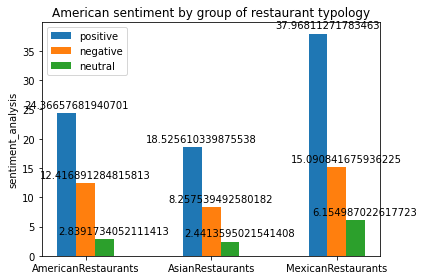

In [47]:
# Costruisco il grafico

labels = ['AmericanRestaurants', 'AsianRestaurants', 'MexicanRestaurants']

# GRAFICO PER AMERICANI

americanPositive = [american_american_positive, american_asian_positive, american_mexican_positive]
americanNegative = [american_american_negative, american_asian_negative, american_mexican_negative]
americanNeutral = [american_american_neutral, american_asian_neutral, american_mexican_neutral]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, americanPositive, width, label='positive')
rects2 = ax.bar(x, americanNegative, width, label='negative')
rects3 = ax.bar(x + width, americanNeutral, width, label='neutral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('sentiment_analysis')
ax.set_title('American sentiment by group of restaurant typology')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

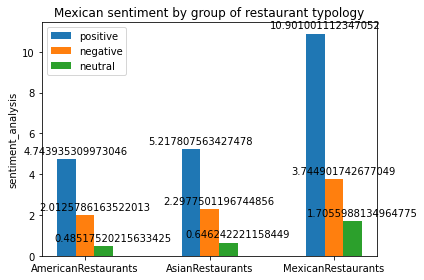

In [48]:
# Costruisco il grafico

labels = ['AmericanRestaurants', 'AsianRestaurants', 'MexicanRestaurants']

# GRAFICO PER MESSICANI

mexicanPositive = [mexican_american_positive, mexican_asian_positive, mexican_mexican_positive]
mexicanNegative = [mexican_american_negative, mexican_asian_negative, mexican_mexican_negative]
mexicanNeutral = [mexican_american_neutral, mexican_asian_neutral, mexican_mexican_neutral]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, mexicanPositive, width, label='positive')
rects2 = ax.bar(x, mexicanNegative, width, label='negative')
rects3 = ax.bar(x + width, mexicanNeutral, width, label='neutral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('sentiment_analysis')
ax.set_title('Mexican sentiment by group of restaurant typology')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()